# 02: Likelihood fits

In [2]:
import SMEFT19
from parscanning import GridScan
from SMEFT19.scenarios import rotBII
from SMEFT19 import likelihood_fits
import warnings
import numpy as np
import pandas as pd
from SMEFT19.plots import likelihood_plot

In [19]:
dim_min = [-0.3, -0.08, -0.025, -0.15, 0]
dim_max = [0, 0.08, 0.025, 0.15, 3.0]
coefs = ['C', 'al', 'bl', 'aq', 'bq']

In [4]:


d_ell = SMEFT19.ellipse.load('../data/ellipses/rotBII.yaml')
bf1 = d_ell['bf']

In [5]:
bf1

array([-1.24142128e-01,  3.21513287e-02, -5.42871866e-06,  1.62377880e-02,
        8.55621324e-01])

## Plotting

In [6]:
def read_meshgrid(par_x, par_y):
    index_x = coefs.index(par_x)
    index_y = coefs.index(par_y)
    xcoords = np.linspace(dim_min[index_x], dim_max[index_x], 50)
    ycoords = np.linspace(dim_min[index_y], dim_max[index_y], 50)
    d = {}
    d[r'$R_{K^{(*)}}$'] = pd.read_csv(f"../data/likelihood/likelihood_rotBII_{par_x}{par_y}_RK.dat", sep = '\t', header=None).values.T
    d[r'$R_{D^{(*)}}$'] = pd.read_csv(f"../data/likelihood/likelihood_rotBII_{par_x}{par_y}_RD.dat", sep = '\t', header=None).values.T
    d['LFV'] = pd.read_csv(f"../data/likelihood/likelihood_rotBII_{par_x}{par_y}_LFV.dat", sep = '\t', header=None).values.T
    d['Global'] = pd.read_csv(f"../data/likelihood/likelihood_rotBII_{par_x}{par_y}.dat", sep = '\t', header=None).values.T
    return (xcoords, ycoords, d)

linewidths is ignored by contourf
No contour levels were found within the data range.


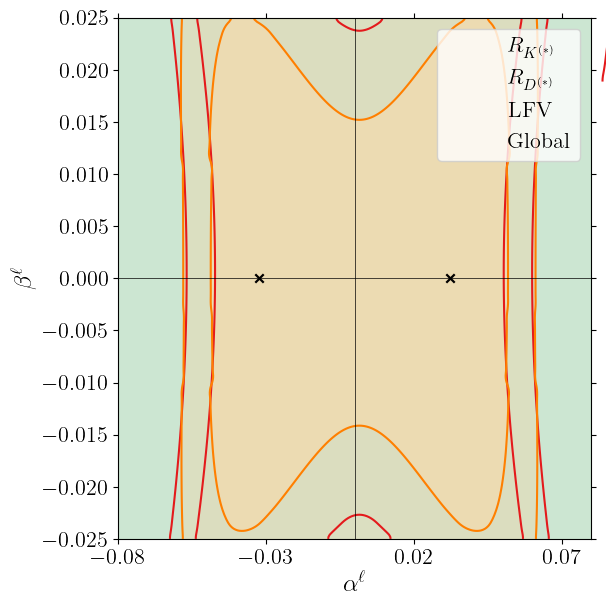

In [20]:
likelihood_plot(read_meshgrid('al', 'bl'),
                -0.08, 0.08, -0.025, 0.025, [r'$\alpha^\ell$', r'$\beta^\ell$'], locleg='upper right',
                colors=[0,1,2,4], bf=([bf1[1], bf1[2]], [-bf1[1], bf1[2]]),
                widths=[1.5,]*5, ticks=(0.05, 0.005),  fout='../data/plots/alphabeta_l')

linewidths is ignored by contourf
No contour levels were found within the data range.


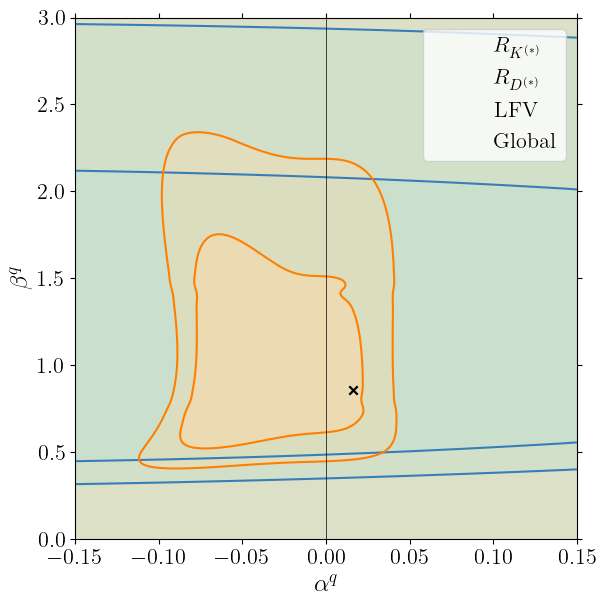

In [21]:
likelihood_plot(read_meshgrid('aq', 'bq'),
                -0.15, 0.15, 0, 3., [r'$\alpha^q$', r'$\beta^q$'], locleg='upper right', ticks=(0.05, 0.5),
                colors=[0,1,2,4], bf=[bf1[3], bf1[4]], widths=[1.5,]*5, fout='../data/plots/alphabeta_q')